In [1]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 465.5 kB/s eta 0:04:29
   ---------------------------------------- 0.1/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.1/124.9 MB 708.1 kB/s eta 0:02:57
   ---------------------------------------- 0.3/124.9 MB 1.0 MB/s eta 0:02:05
   ---------------------------------------- 0.3/124.9 MB 964.9 kB/s eta 0:02:10
   ---------------------------------------- 0.4/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 0.7/124.9 MB 1.7 MB/s eta 0:01:12
   ---------------------------------------- 0.8/124.9 MB 1.8 MB/s eta 0:01:09
   ---------------------------------------- 1.2/124.9 MB 2.4 MB/s eta 0:00:53
   ---

In [2]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 1.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.4 MB 1.2 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 1.6 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.4 MB 1.8 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.4 MB 2.4 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/1.4 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.0 MB/s eta 0:00:00


In [82]:
import pandas as pd
from numpy import loadtxt
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [68]:
Data_Train = pd.read_csv("Titanic_train.csv")

In [36]:
Data_Train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [69]:
# Desired column order
new_order = ['PassengerId', 'Pclass', 'Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived']

# Reorder the DataFrame
Data_Train = Data_Train[new_order]

In [53]:
Data_Train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [54]:
Data_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
Data_Train = Data_Train.drop("PassengerId", axis =1)

In [73]:
Data_Train = Data_Train.drop("Cabin", axis =1)

In [74]:
Data_Train = Data_Train.drop("Name", axis =1)

In [75]:
Data_Train = Data_Train.drop("Ticket", axis =1)

In [76]:
Data_Train = Data_Train.drop("Fare", axis =1)

In [77]:
Data_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Embarked  889 non-null    object 
 6   Survived  891 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [78]:
Data_Train = Data_Train.dropna()

In [79]:
Data_Train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Embarked  712 non-null    object 
 6   Survived  712 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 44.5+ KB


In [83]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
Data_Train['Sex'] = label_encoder.fit_transform(Data_Train['Sex'])

In [85]:
# Fit and transform the data
Data_Train['Embarked'] = label_encoder.fit_transform(Data_Train['Embarked'])

In [86]:
Data_Train

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,1,22.0,1,0,2,0
1,1,0,38.0,1,0,0,1
2,3,0,26.0,0,0,2,1
3,1,0,35.0,1,0,2,1
4,3,1,35.0,0,0,2,0
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,1,0
886,2,1,27.0,0,0,2,0
887,1,0,19.0,0,0,2,1
889,1,1,26.0,0,0,0,1


In [87]:
Array_Train = Data_Train.values
X_Train = Array_Train[:, 0:6]
Y_Train = Array_Train[:, 6]

In [88]:
X_Train

array([[ 3.,  1., 22.,  1.,  0.,  2.],
       [ 1.,  0., 38.,  1.,  0.,  0.],
       [ 3.,  0., 26.,  0.,  0.,  2.],
       ...,
       [ 1.,  0., 19.,  0.,  0.,  2.],
       [ 1.,  1., 26.,  0.,  0.,  0.],
       [ 3.,  1., 32.,  0.,  0.,  1.]])

In [89]:
Y_Train

array([0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0.

In [90]:
Data_Train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int32  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Embarked  712 non-null    int32  
 6   Survived  712 non-null    int64  
dtypes: float64(1), int32(2), int64(4)
memory usage: 38.9 KB


C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


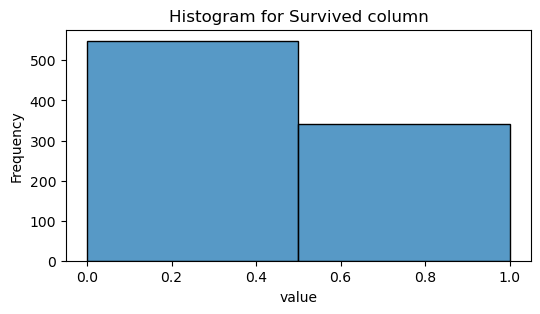

In [45]:
#Data for ploting Survived columns value
Hist_Survived = Data_Train.Survived
#Creating the histogram

#mentioning the size of the Histogram
plt.figure(figsize=(6,3))

sns.histplot(Hist_Survived, bins=2)

plt.title("Histogram for Survived column")
plt.xlabel("value")
plt.ylabel("Frequency")
plt.show()

C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

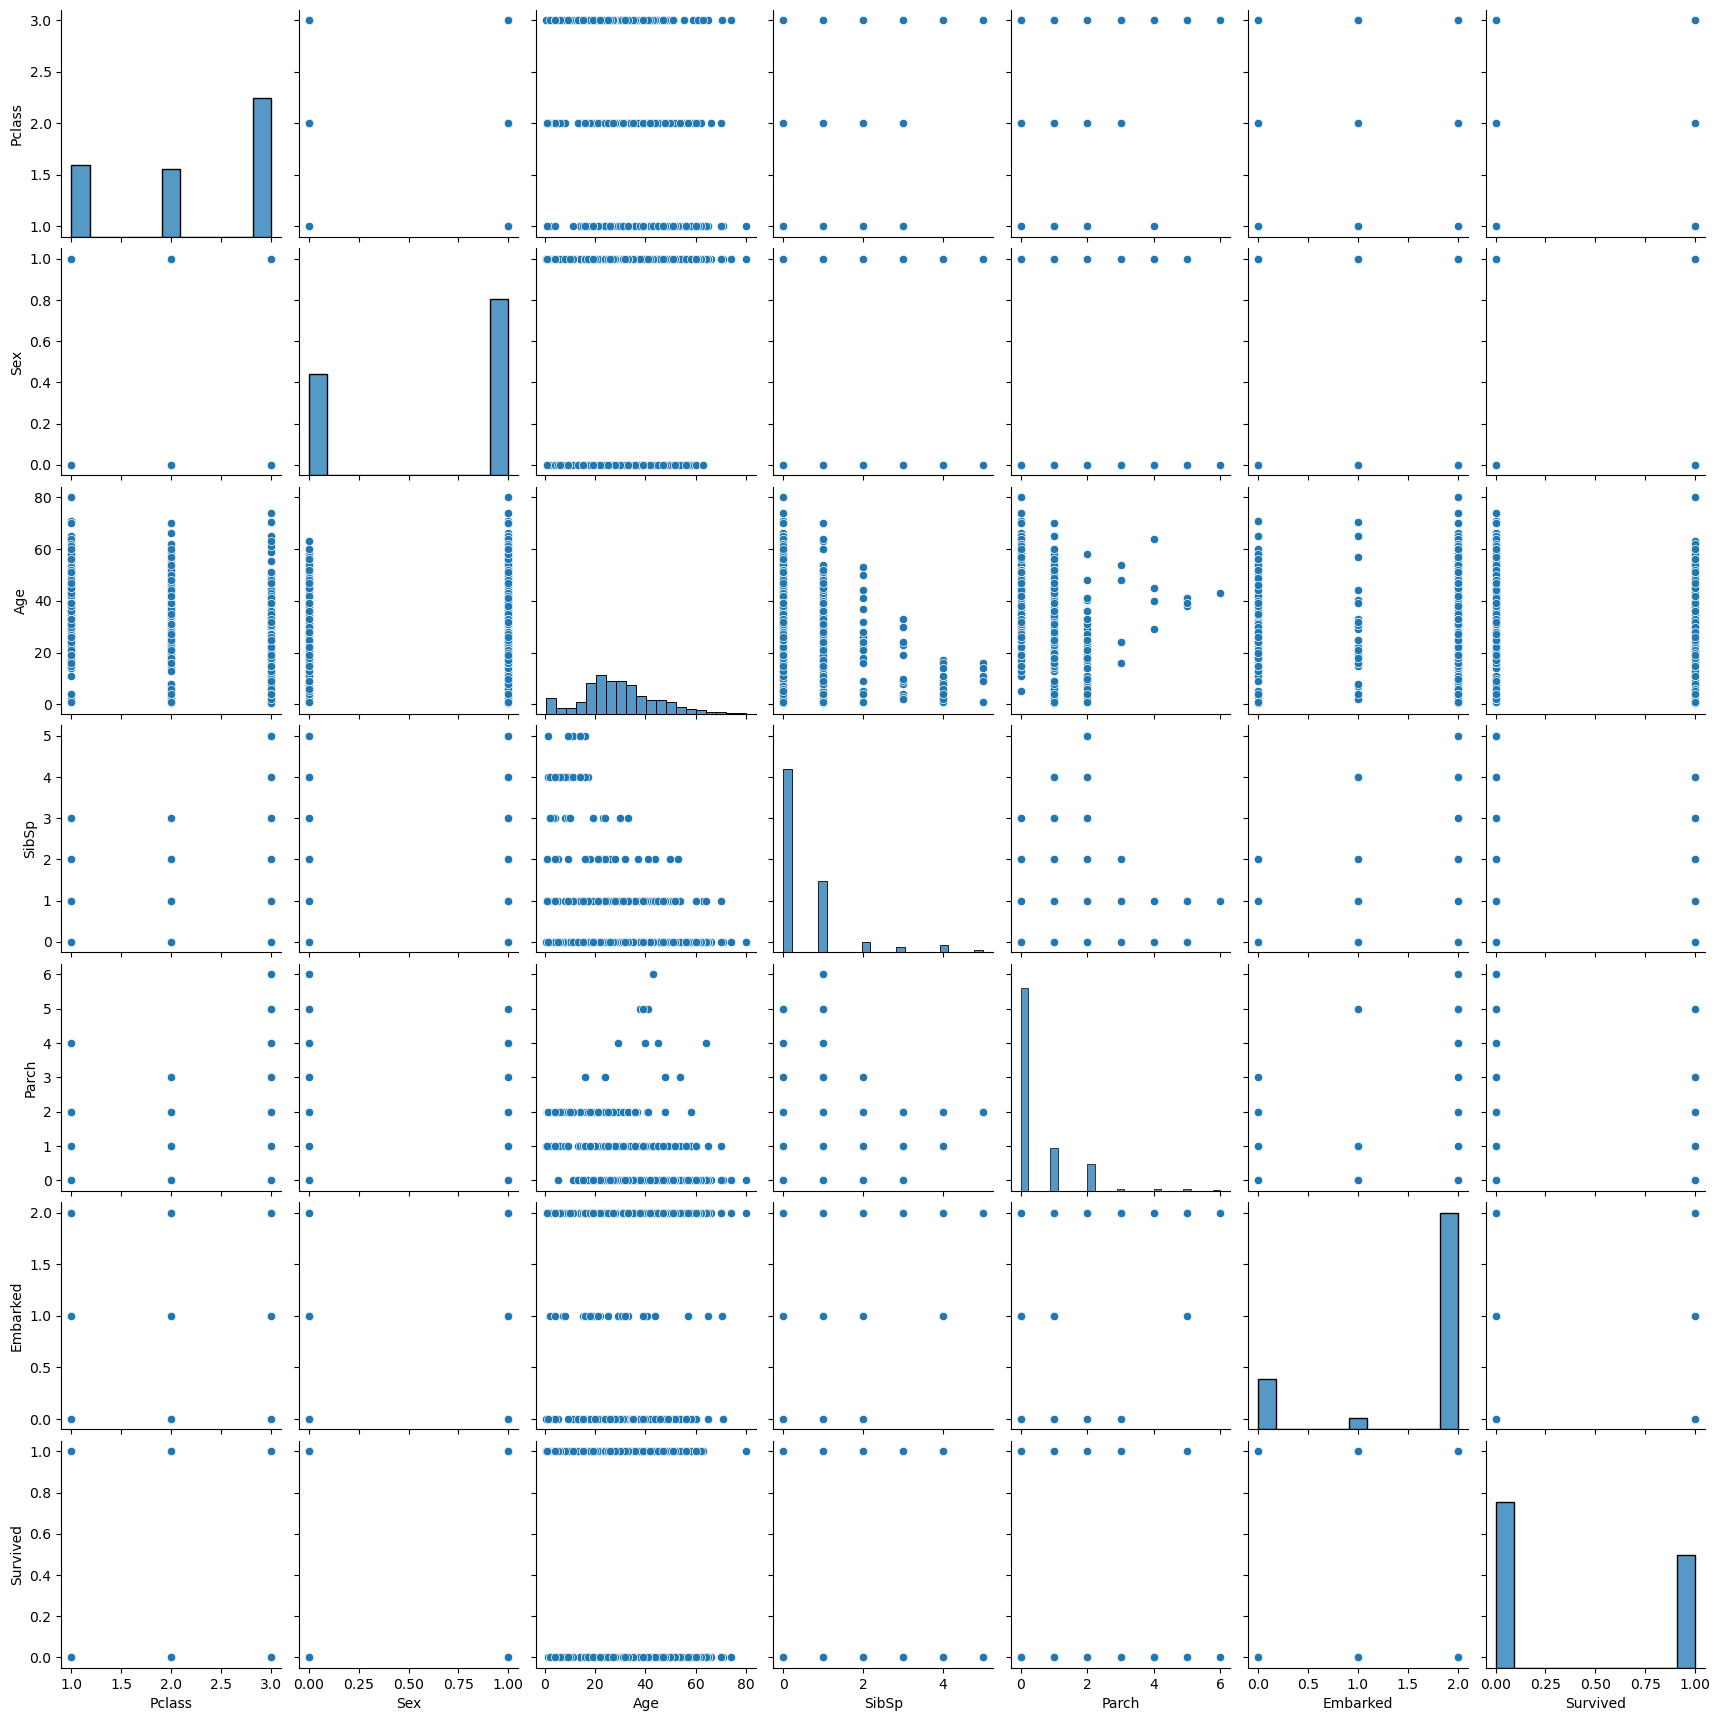

In [93]:
# Create the pair plot
sns.pairplot(Data_Train)

In [94]:
# fit model no training data
model = XGBClassifier(n_estimators=100,max_depth=None)
kfold = KFold(n_splits=10, random_state= 7, shuffle=True)
results = cross_val_score(model, X_Train, Y_Train, cv=kfold)
#model.fit(X_train, y_train)

In [95]:
results

array([0.83333333, 0.79166667, 0.78873239, 0.78873239, 0.70422535,
       0.8028169 , 0.77464789, 0.78873239, 0.78873239, 0.77464789])

In [97]:
model.fit(X_Train, Y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [98]:
# make predictions for Train data
Y_pred = model.predict(X_Train)
Y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [99]:
# evaluate predictions
Accuracy = accuracy_score(Y_Train, Y_pred)
print("Accuracy: %.2f%%" % (Accuracy * 100.0))

Accuracy: 93.12%


In [100]:
Data_Test = pd.read_csv("Titanic_test.csv")

In [101]:
Data_Test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [103]:
Data_Test = Data_Test.drop("PassengerId", axis =1)

In [104]:
Data_Test = Data_Test.drop("Cabin", axis =1)

In [106]:
Data_Test = Data_Test.drop("Name", axis =1)

In [107]:
Data_Test = Data_Test.drop("Ticket", axis =1)

In [108]:
Data_Test = Data_Test.drop("Fare", axis =1)

In [109]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
Data_Test['Sex'] = label_encoder.fit_transform(Data_Test['Sex'])

In [112]:
Data_Test = Data_Test.dropna()

In [119]:
# Fit and transform the data
Data_Test['Embarked'] = label_encoder.fit_transform(Data_Test['Embarked'])

In [120]:
Data_Test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 415
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    332 non-null    int64  
 1   Sex       332 non-null    int32  
 2   Age       332 non-null    float64
 3   SibSp     332 non-null    int64  
 4   Parch     332 non-null    int64  
 5   Embarked  332 non-null    int32  
dtypes: float64(1), int32(2), int64(3)
memory usage: 15.6 KB


In [121]:
# make predictions for Train data
Y_Pred_Test = model.predict(Data_Test)
Y_Pred_Test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,

In [122]:
import lightgbm as lgb

# Convert the data to LightGBM dataset format
Lgb_Train = lgb.Dataset(X_Train, Y_Train)

In [127]:
X_Train

array([[ 3.,  1., 22.,  1.,  0.,  2.],
       [ 1.,  0., 38.,  1.,  0.,  0.],
       [ 3.,  0., 26.,  0.,  0.,  2.],
       ...,
       [ 1.,  0., 19.,  0.,  0.,  2.],
       [ 1.,  1., 26.,  0.,  0.,  0.],
       [ 3.,  1., 32.,  0.,  0.,  1.]])

In [128]:
Y_Train

array([0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0.

In [123]:
# Define parameters dictionary for training the model
params = {}
params['learning_rate'] = 0.002, # 0.1,0.3
params['boosting_type'] = 'gbdt' # dart
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5 
params['num_leaves'] = 10
params['min_data'] = 20
params['max_depth'] = 10

params

{'learning_rate': (0.002,),
 'boosting_type': 'gbdt',
 'objective': 'binary',
 'metric': 'binary_logloss',
 'sub_feature': 0.5,
 'num_leaves': 10,
 'min_data': 20,
 'max_depth': 10}

In [126]:
Lgb_Train

In [124]:
# Train the model
clf = lgb.train(params, Lgb_Train, 1500)

[LightGBM] [Info] Number of positive: 288, number of negative: 424
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.404494 -> initscore=-0.386773
[LightGBM] [Info] Start training from score -0.386773
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [129]:
#Prediction of probability of positive class (use threshold to convert)
y_pred = clf.predict(X_Train)
predictions = [round(value) for value in y_pred]

In [130]:
# Convert probabilities to class labels
class_labels = (y_pred > 0.5).astype(int)
class_labels

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [131]:
accuracy = accuracy_score(Y_Train, class_labels)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.55%
